OULMANE Sabrina IBO 3

# **PROJET PYTHON : INCIDENT EVENT LOG**



# CHARGEMENT DE LA DATASET

In [0]:
#installations des packages, modules nécessaires
import pandas as pd
import io 
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [2]:
from google.colab import files
data = files.upload()

Saving incident_event_log.csv to incident_event_log.csv


In [3]:
df = pd.read_csv(io.BytesIO(data['incident_event_log.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,15,16,17,23,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EXPLORATION DES DONNEES

In [4]:
df.head()

,number,ident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,category.1,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,45,New,True,0,0,0,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,21,29/2/2016 01:23,Phone,143,55,170,72,?,2,2,3,56,?,True,False,Do Not Notify,?,?,?,?,5,149,29/2/2016 11:29,5/3/2016 12:00
1,45,Resolved,True,0,0,2,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,642,29/2/2016 08:53,Phone,143,55,170,72,?,2,2,3,56,?,True,False,Do Not Notify,?,?,?,?,5,149,29/2/2016 11:29,5/3/2016 12:00
2,45,Resolved,True,0,0,3,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,804,29/2/2016 11:29,Phone,143,55,170,72,?,2,2,3,56,?,True,False,Do Not Notify,?,?,?,?,5,149,29/2/2016 11:29,5/3/2016 12:00
3,45,Closed,False,0,0,4,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,908,5/3/2016 12:00,Phone,143,55,170,72,?,2,2,3,56,?,True,False,Do Not Notify,?,?,?,?,5,149,29/2/2016 11:29,5/3/2016 12:00
4,47,New,True,0,0,0,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,746,29/2/2016 04:57,Phone,165,40,215,471,?,2,2,3,70,89,True,False,Do Not Notify,?,?,?,?,5,81,1/3/2016 09:52,6/3/2016 10:00


Avant le chargement du fichier csv, certaines colonnes ont éte modifiées manuellement afin d'enlever les parties en "string" et garder seulement les parties numériques

In [5]:
print(df.dtypes)

number                      int64
ident_state                object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by              int64
sys_updated_at             object
contact_type               object
location                   object
category                   object
category.1                 object
u_symptom                  object
cmdb_ci                    object
impact                      int64
urgency                     int64
priority                    int64
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

Les features sont soit des objets, des booléens ou des integers. Afin de faciliter nos modèles de régression, nous allons au fur et à mesure toutes les transformer en valeurs numériques.

In [6]:
print(df.info)

<bound method DataFrame.info of         number ident_state  ...      resolved_at        closed_at
0           45         New  ...  29/2/2016 11:29   5/3/2016 12:00
1           45    Resolved  ...  29/2/2016 11:29   5/3/2016 12:00
2           45    Resolved  ...  29/2/2016 11:29   5/3/2016 12:00
3           45      Closed  ...  29/2/2016 11:29   5/3/2016 12:00
4           47         New  ...   1/3/2016 09:52   6/3/2016 10:00
...        ...         ...  ...              ...              ...
141707  120835      Closed  ...  16/2/2017 09:53  16/2/2017 09:53
141708  121064      Active  ...  16/2/2017 16:38  16/2/2017 16:38
141709  121064      Active  ...  16/2/2017 16:38  16/2/2017 16:38
141710  121064    Resolved  ...  16/2/2017 16:38  16/2/2017 16:38
141711  121064      Closed  ...  16/2/2017 16:38  16/2/2017 16:38

[141712 rows x 36 columns]>


In [7]:
La dataset est constitué de 36 features et au total de 141 712 données

SyntaxError: ignored

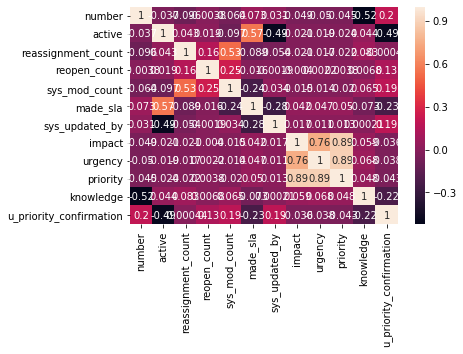

In [8]:
import matplotlib.pyplot as plt
matrice_correlation = df.corr()
import seaborn as sbn
sbn.heatmap(matrice_correlation, annot=True)

Pour l'instant, nous ne pouvons pas déterminer des corrélations entre les features. Nous devons réaliser quelques "features engineering"

# FEATURE ENGINEERING

***Missing values***

Nous allons parcourir toutes les colonnes de la dataset, voir combien les colonnes ont de valeurs manquantes. Ici, les valeurs manquantes sont représentées par le symbole suivant : "?"

In [9]:
for column in df.columns:
    n = 0
    for i in range(len(df[column])):
        if(df[column][i] == '?'):
            n+=1
    print(column, " ", n)

number   0
ident_state   0
active   0
reassignment_count   0
reopen_count   0
sys_mod_count   0
made_sla   0
caller_id   29
opened_by   4835
opened_at   0
sys_created_by   53076
sys_created_at   53076
sys_updated_by   0
sys_updated_at   0
contact_type   0
location   76
category   78
category.1   111
u_symptom   32964
cmdb_ci   141267
impact   0
urgency   0
priority   0
assignment_group   14213
assigned_to   27496
knowledge   0
u_priority_confirmation   0
notify   0
problem_id   139417
rfc   140721
vendor   141468
caused_by   141689
closed_code   714
resolved_by   226
resolved_at   3141
closed_at   0


Sachant que nous avons 141 712 lignes, nous pouvons supprimer certaines colonnes car elles contiennent majoritairement que des données manquantes : cmdb_ci,problem_id, rfc, vendor, caused_by
De plus, nous allons supprimer les colonnes "ident_state", "contact_type", "notify" car elles ne nous semblent pas pertinentes.

In [10]:
df = df.drop(['cmdb_ci', 'problem_id','rfc','vendor','caused_by','ident_state','contact_type','notify'], axis=1)
df.head()

,number,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,location,category,category.1,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,45,True,0,0,0,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,21,29/2/2016 01:23,143,55,170,72,2,2,3,56,?,True,False,5,149,29/2/2016 11:29,5/3/2016 12:00
1,45,True,0,0,2,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,642,29/2/2016 08:53,143,55,170,72,2,2,3,56,?,True,False,5,149,29/2/2016 11:29,5/3/2016 12:00
2,45,True,0,0,3,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,804,29/2/2016 11:29,143,55,170,72,2,2,3,56,?,True,False,5,149,29/2/2016 11:29,5/3/2016 12:00
3,45,False,0,0,4,True,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,908,5/3/2016 12:00,143,55,170,72,2,2,3,56,?,True,False,5,149,29/2/2016 11:29,5/3/2016 12:00
4,47,True,0,0,0,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,746,29/2/2016 04:57,165,40,215,471,2,2,3,70,89,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00


In [11]:
df.duplicated().value_counts()

False    141712
dtype: int64

Il n'y a pas de données dupliquées.

Pour les données manquantes dans les colonnes restantes, nous allons tout simplement les supprimer

In [0]:
df.drop(df.loc[df['caller_id']=="?"].index, inplace=True)
df.drop(df.loc[df['caller_id']=="?"].index, inplace=True)
df.drop(df.loc[df['opened_by']=="?"].index, inplace=True)
df.drop(df.loc[df['sys_created_by']=="?"].index, inplace=True)
df.drop(df.loc[df['location']=="?"].index, inplace=True)
df.drop(df.loc[df['category']=="?"].index, inplace=True)
df.drop(df.loc[df['u_symptom']=="?"].index, inplace=True)
df.drop(df.loc[df['assignment_group']=="?"].index, inplace=True)
df.drop(df.loc[df['assigned_to']=="?"].index, inplace=True)
df.drop(df.loc[df['closed_code']=="?"].index, inplace=True)
df.drop(df.loc[df['resolved_by']=="?"].index, inplace=True)
df.drop(df.loc[df['resolved_at']=="?"].index, inplace=True)
df.drop(df.loc[df['sys_created_at']=="?"].index, inplace=True)
df.drop(df.loc[df['sys_updated_at']=="?"].index, inplace=True)

In [13]:
df_copy=df.copy()
df_copy.head()

,number,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,location,category,category.1,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
4,47,True,0,0,0,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,746,29/2/2016 04:57,165,40,215,471,2,2,3,70,89,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00
5,47,True,1,0,1,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,21,29/2/2016 05:30,165,40,215,471,2,2,3,24,31,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00
6,47,True,1,0,2,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,21,29/2/2016 05:33,165,40,215,471,2,2,3,24,31,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00
7,47,True,1,0,3,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,804,29/2/2016 11:31,165,40,215,471,2,2,3,24,31,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00
8,47,True,1,0,4,True,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,703,29/2/2016 11:32,165,40,215,471,2,2,3,24,31,True,False,5,81,1/3/2016 09:52,6/3/2016 10:00


***DATES***

Nous possédons au total 5 colonnes au format date : 'closed_at', 'opened_at','sys_created_at','sys_updated_at','resolved_at'.

Nous allons premièrement les convertir en datetime

In [0]:
from datetime import datetime

df_copy['closed_at']=df_copy.closed_at.astype(str)
df_copy['closed_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in df_copy['closed_at']]

df_copy['opened_at']=df_copy.opened_at.astype(str)
df_copy['opened_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in df_copy['opened_at']]

df_copy['sys_created_at']=df_copy.sys_created_at.astype(str)
df_copy['sys_created_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in df_copy['sys_created_at']]

df_copy['sys_updated_at']=df_copy.sys_updated_at.astype(str)
df_copy['sys_updated_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in df_copy['sys_updated_at']]

df_copy['resolved_at']=df_copy.resolved_at.astype(str)
df_copy['resolved_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in df_copy['resolved_at']]

# **CREATION DE LA FEATURE TARGET**

Le but de ce projet est de prédire le temps restant avant complétion.
Or, cette colonne n'existe pas dans notre dataset. Nous allons la créer en faisant une soustraction entre le temps de fermeture et le temps de l'ouverture de l'incident.
Puis nous allons convertir cette feature en heures

Aussi, nous allons créer une nouvelle feature 'sys_time' qui est le temps entre la mise à jour de l'incident dans le système et sa création.

In [0]:

df_copy['time_completion']=df_copy['closed_at']-df_copy['opened_at']
df_copy['time_completion']=(df_copy['time_completion'].dt.days * 24) + df_copy['time_completion'].dt.seconds / 3600

df_copy['sys_time']=df_copy['sys_updated_at']-df_copy['sys_created_at']
df_copy['sys_time']=(df_copy['sys_time'].dt.days * 24) + df_copy['sys_time'].dt.seconds / 3600

df_copy['closed_time']=df_copy['closed_at']-df_copy['resolved_at']
df_copy['closed_time']=(df_copy['closed_time'].dt.days * 24) + df_copy['closed_time'].dt.seconds / 3600

Nous supprimons les colonnes : 'opened_at', 'closed_at', 'resolved_at', 'sys_created_at', 'sys_updated_at' car nous n'avons plus besoin

In [0]:
df_copy = df_copy.drop(['opened_at', 'closed_at','resolved_at','sys_created_at','sys_updated_at'], axis=1)

***Conversion en valeurs numériques des features au format "object"***

In [0]:
#Conversion en valeurs numériques
df_copy['caller_id'] = pd.to_numeric(df_copy['caller_id'])
df_copy['opened_by'] = pd.to_numeric(df_copy['opened_by'])
df_copy['sys_created_by'] = pd.to_numeric(df_copy['sys_created_by'])
df_copy['location'] = pd.to_numeric(df_copy['location'])
df_copy['category'] = pd.to_numeric(df_copy['category'])
df_copy['category.1'] = pd.to_numeric(df_copy['category.1'])
df_copy['assignment_group'] = pd.to_numeric(df_copy['assignment_group'])
df_copy['assigned_to'] = pd.to_numeric(df_copy['assigned_to'])
df_copy['closed_code'] = pd.to_numeric(df_copy['closed_code'])
df_copy['resolved_by'] = pd.to_numeric(df_copy['resolved_by'])
df_copy['u_symptom'] = pd.to_numeric(df_copy['u_symptom'])

***Conversion des features bool en numérique***

In [0]:
#Conversion des booléens
df_copy['active']=[ 1 if element==True else 0 for element in df_copy['active']]
df_copy['made_sla']=[ 1 if element==True else 0 for element in df_copy['made_sla']]
df_copy['knowledge']=[1 if element==True else 0 for element in df_copy['knowledge']]
df_copy['u_priority_confirmation']=[1 if element==True else 0 for element in df_copy['u_priority_confirmation']]

# CREATION D'UNE NOUVELLE DATASET

Pour conclure ce feature engineering, nous allons créer une nouvelle dataset qui regroupe tous les incidents ayant le même numéro et qui garde la valeur la plus representative dans les autres colonnes

In [0]:
#GROUP BY
data = df_copy.groupby('number').agg(
    {
        'active':max,
     'reassignment_count':max,
     'reopen_count':max,
     'sys_mod_count':max,
     'made_sla':max,
     'caller_id':max,
     'opened_by':max,
     'sys_created_by':max,
     'sys_updated_by':max,
     'location':max,
     'category':max,
     'category.1':max,
     'u_symptom':max,
     'impact':max,
     'urgency':max,
     'priority':max,
     'assignment_group':max,
     'assigned_to':max,
     'knowledge':max,
     'u_priority_confirmation':max,
     'closed_code':max,
     'resolved_by':max,
     'time_completion':max,
     'sys_time':max,
     'closed_time':max,

    }
)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9610 entries, 47 to 113694
Data columns (total 25 columns):
active                     9610 non-null int64
reassignment_count         9610 non-null int64
reopen_count               9610 non-null int64
sys_mod_count              9610 non-null int64
made_sla                   9610 non-null int64
caller_id                  9610 non-null int64
opened_by                  9610 non-null int64
sys_created_by             9610 non-null int64
sys_updated_by             9610 non-null int64
location                   9610 non-null int64
category                   9610 non-null int64
category.1                 9610 non-null int64
u_symptom                  9610 non-null int64
impact                     9610 non-null int64
urgency                    9610 non-null int64
priority                   9610 non-null int64
assignment_group           9610 non-null int64
assigned_to                9610 non-null int64
knowledge                  9610 non-null int

On se retrouve maintenant avec une dataset de 25 colonnes et 9610 données de format float ou int

# **VISUALISATION DES DONNEES**

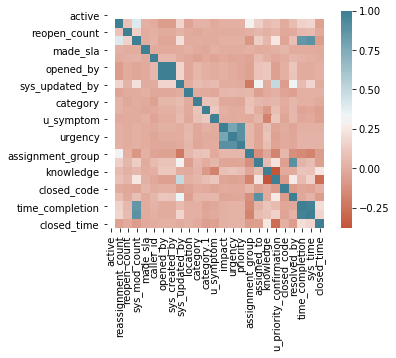

In [21]:
import seaborn as sns
matriceDeCorrelation = data.corr()

sns.heatmap(matriceDeCorrelation, cmap = sns.diverging_palette(20,220, n = 200),square=True) 

In [22]:
data.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))
# Cf. https://matplotlib.org/examples/color/colormaps_reference.html pour les codes couleurs

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,location,category,category.1,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,time_completion,sys_time,closed_time
active,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
reassignment_count,nan,1.0,0.063,0.48,0.0094,0.002,-0.09,-0.09,0.16,-0.032,-0.0074,0.056,0.029,0.0074,0.0035,-0.00077,0.37,0.11,0.026,0.12,-0.038,0.074,0.2,0.27,-0.026
reopen_count,nan,0.063,1.0,0.11,0.0011,0.015,-0.012,-0.012,0.035,-0.0037,-0.0069,0.0019,-0.0082,-0.0063,-0.0037,-0.0024,0.028,0.028,0.021,0.036,-0.01,-0.013,0.07,0.071,-0.018
sys_mod_count,nan,0.48,0.11,1.0,0.0074,0.011,-0.05,-0.05,0.33,-0.013,0.0065,0.0028,-0.025,-0.0084,-0.0089,-0.0087,-0.016,0.18,0.094,0.3,-0.077,0.14,0.41,0.62,-0.052
made_sla,nan,0.0094,0.0011,0.0074,1.0,-0.0043,-0.01,-0.01,0.00031,0.01,-0.013,-0.013,0.012,0.001,0.00077,0.00061,0.0054,-0.0028,0.004,0.016,0.021,-0.004,-0.0098,-0.01,-0.013
caller_id,nan,0.002,0.015,0.011,-0.0043,1.0,0.02,0.02,0.028,-0.0094,-0.032,-0.011,-0.023,-0.012,-0.026,-0.019,-0.02,0.039,0.0057,-0.013,0.006,0.027,0.03,0.018,0.0077
opened_by,nan,-0.09,-0.012,-0.05,-0.01,0.02,1.0,0.99,0.1,-0.0064,0.058,0.012,0.002,0.04,0.031,0.029,-0.04,0.053,0.13,-0.058,0.021,0.059,-0.026,-0.01,0.036
sys_created_by,nan,-0.09,-0.012,-0.05,-0.01,0.02,0.99,1.0,0.1,-0.0068,0.057,0.012,0.0025,0.039,0.03,0.028,-0.039,0.053,0.13,-0.059,0.022,0.058,-0.025,-0.01,0.038
sys_updated_by,nan,0.16,0.035,0.33,0.00031,0.028,0.1,0.1,1.0,-0.0062,0.0078,-0.012,0.0048,0.017,0.0083,0.013,-0.19,0.41,0.032,0.37,-0.13,0.4,0.018,0.35,-0.028
location,nan,-0.032,-0.0037,-0.013,0.01,-0.0094,-0.0064,-0.0068,-0.0062,1.0,0.0049,-0.017,-0.017,0.026,0.035,0.026,0.011,-0.036,-0.0066,0.014,-0.069,-0.035,-0.022,-0.015,-0.0089


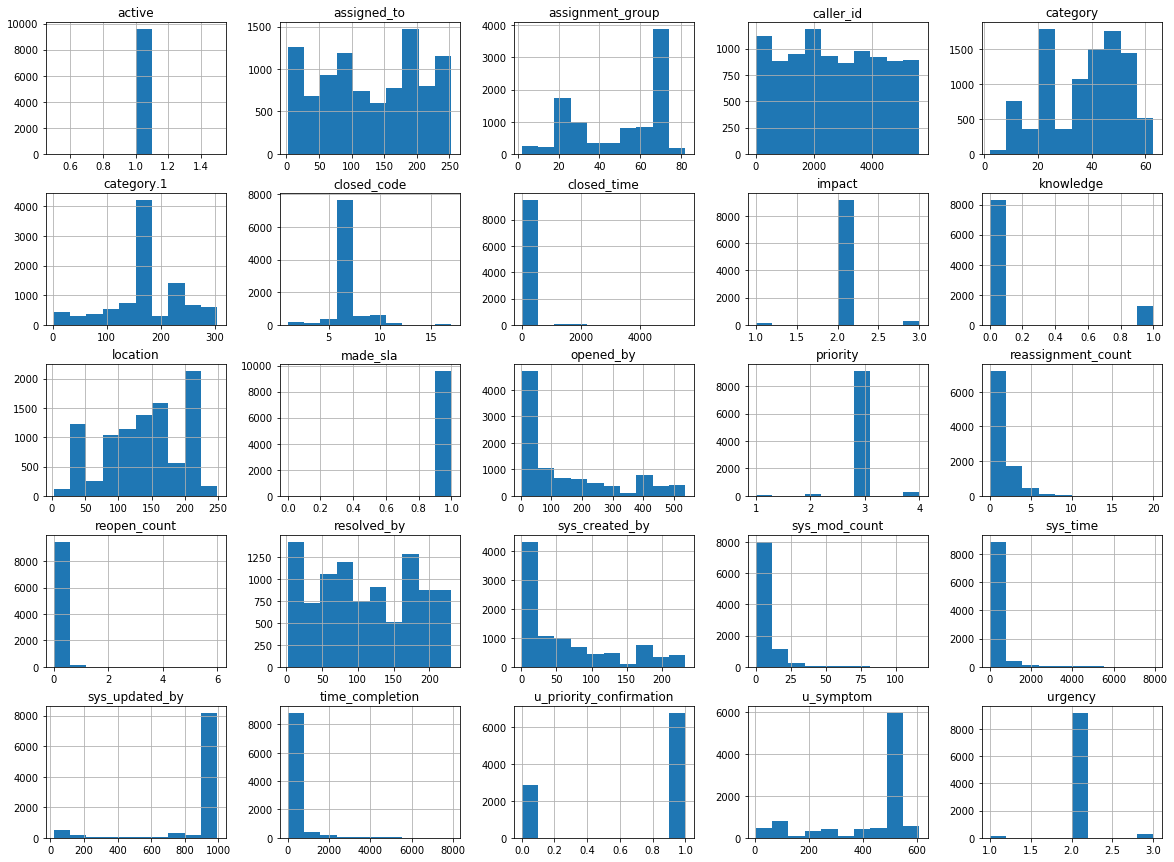

In [23]:
plt.rcParams["figure.figsize"] = 20,15
_fig = data.hist()

# **MODELES**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
##On split les données en train et test, 80% des données en train et 20% des données en test
list_var=data.columns.drop('time_completion')
y=data.time_completion
X=data[list_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **LINEAR REGRESSION**

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#To retrieve the intercept:
print("Intercept",regressor.intercept_)
#For retrieving the slope:
print("Slope",regressor.coef_)

Intercept 168.21193469088732
Slope [ 0.00000000e+00 -1.22273785e+00 -2.64919413e+01  3.64917895e+00
  1.01202873e+02  4.60623013e-04  5.97547499e-02  5.60212608e-02
 -2.65184221e-01  3.62453980e-02  2.65012635e-01 -4.38043700e-02
 -1.91765745e-03 -8.32212949e+00  1.45400007e+00  6.65766661e+00
  1.87348240e-02  3.11128857e-01 -3.84141532e+01 -7.17656086e+01
 -1.14340010e+00 -3.51616916e-01  9.38688205e-01  1.62793462e-01]


In [0]:
y_pred = regressor.predict(X_test)

In [29]:
y_test.shape

(1922,)

In [0]:
y_test = y_test.values.reshape(1922,)

In [31]:
y_pred.shape

(1922,)

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,123.233333,116.380323
1,431.683333,436.325270
2,125.250000,132.211643
3,4437.466667,4400.095556
4,196.950000,203.262526
...,...,...
1917,120.583333,126.174454
1918,140.883333,130.416694
1919,294.000000,295.285916
1920,447.983333,283.302957


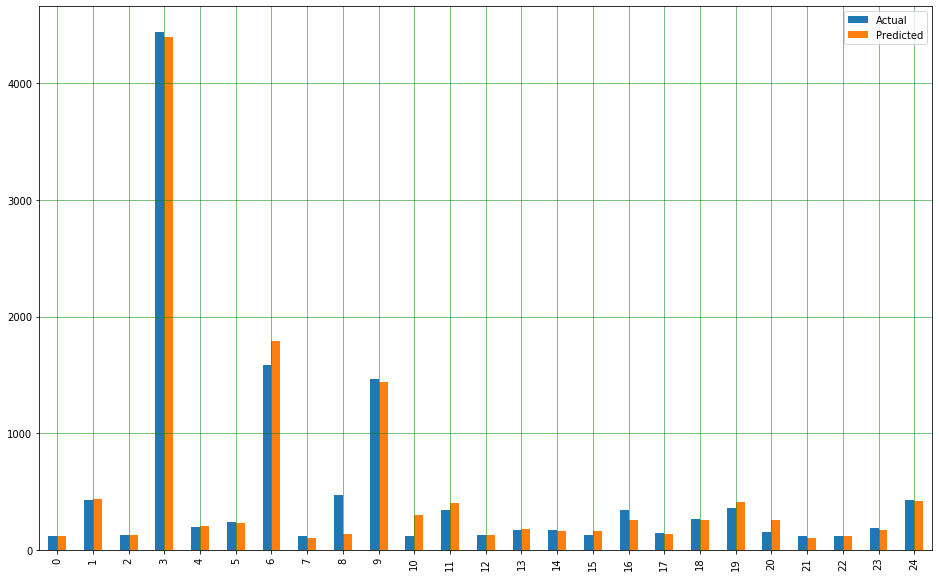

In [33]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

On peut remarquer que la prédiction a plutôt très bien marché. Les valeurs actuelles et prédites sont quasi-pareilles.

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 41.49087410388122
Mean Squared Error: 5502.782437673679
Root Mean Squared Error: 74.18074168996748


En regardant les valeurs, on peut conclure que le modèle est plutôt bien.

# **RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=5)

In [36]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
model.score(X_test, y_test)

0.9872927848519223

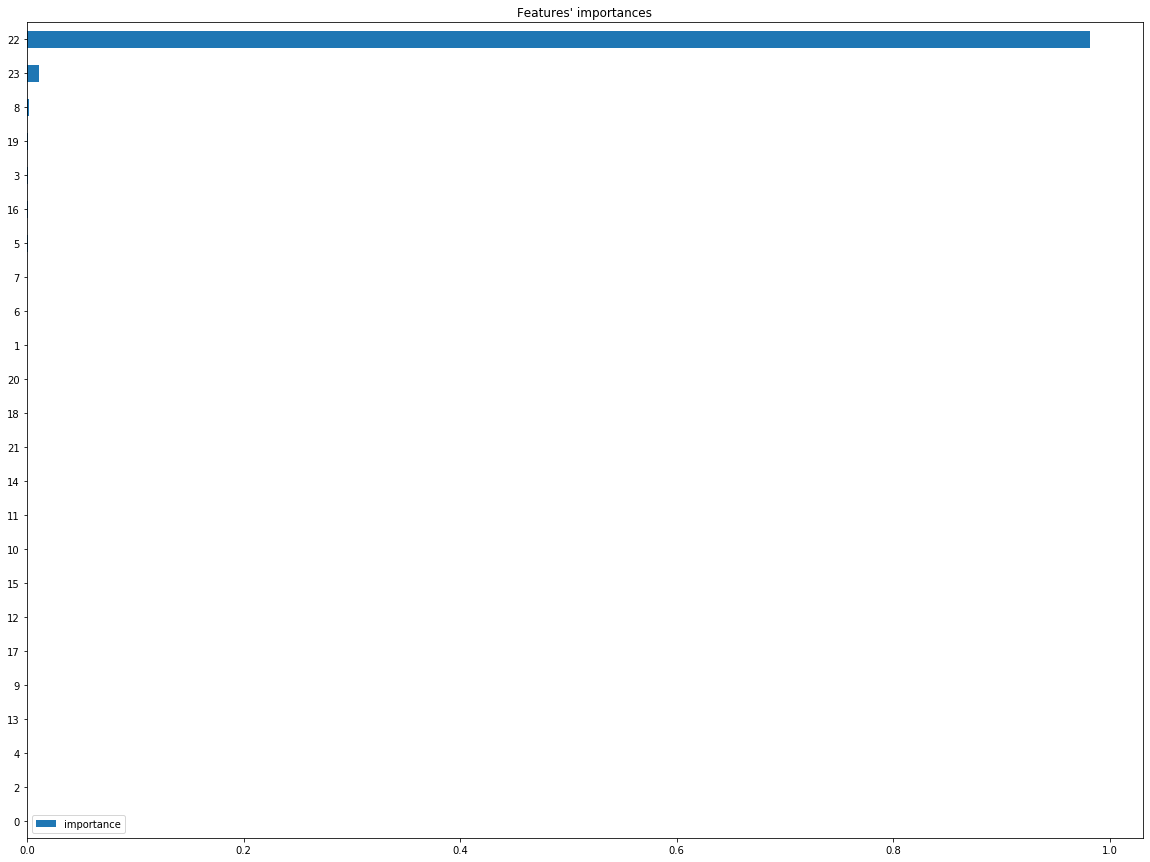

In [40]:
names_and_feature_imp = pd.DataFrame({'names':list_var,
                                     'importance': model.feature_importances_})
names_and_feature_imp.sort_values(["importance"], ascending=True, inplace=True)
names_and_feature_imp.plot(kind='barh', title="Features' importances")

D'après le graphique, la feature "resolved_by"(22) a une très grande influence sur le temps de résolution des incidents.
*Le numéro 23 correspond au "time_complétion"*